Author: Rajendran Kaviya

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
# Load data
data = pd.read_excel("data/CCPP/Folds5x2_pp.xlsx",sheet_name=0)
data

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


### Preliminary data exploration

i. There are 9568 rows and 5 columns. The columns represent the ambient variables (features) - Ambient Temperature (AT), Exhaust Vacuum (V), Ambient Pressure (AP), Relative Humidity (RH) and the output - net hourly electrical energy output (PE). The rows represent the hourly average of the ambient variables when the plant is working at full load.

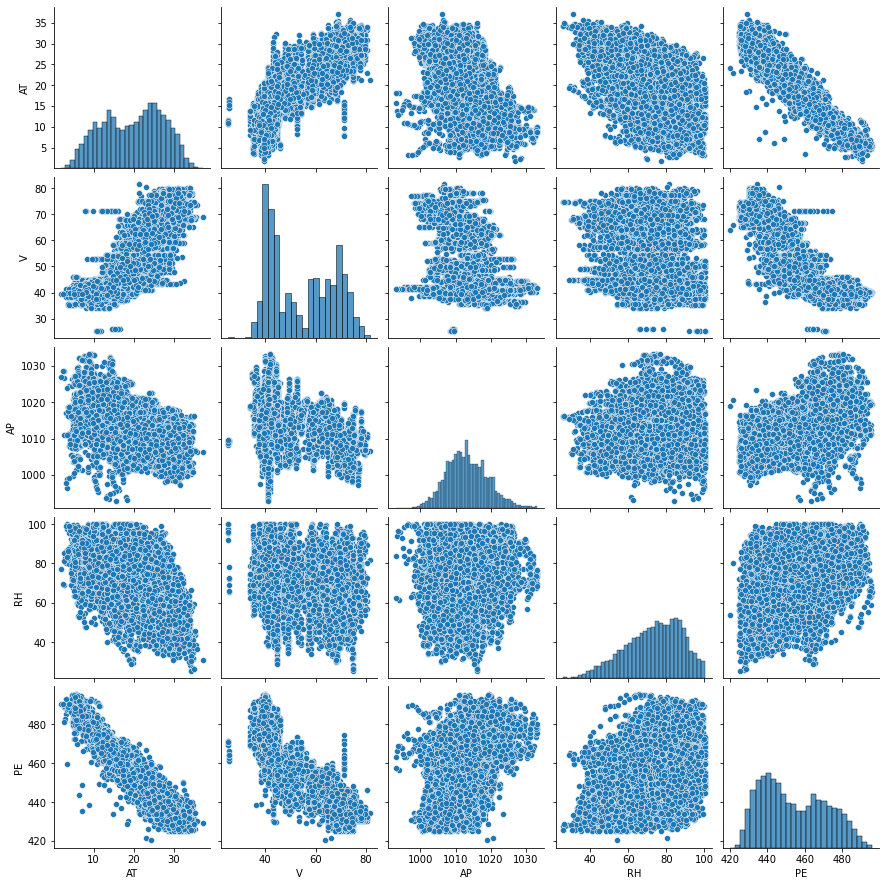

In [3]:
sns.pairplot(data)

Energy output seems to decrease linearly with ambient temperature. A similar relationship can be observed between energy output and exhaust vacuum, although not as strong. Energy output seems to be relatively insensitive to variation in ambient pressure and relative humidity.

In [4]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


### Simple linear regression

Here, we perform simple linear regression for predictors AT, V, AP, RH respectively. To analyse the statistical significance of the predictor, we also calculate the standard errors, t-statistic and p-values of $\hat{\beta_1}$ and $\hat{\beta_0}$ for each predictor. The results are summarized in a table after the following code blocks.

In [5]:
# Simple regression for AT
X_AT = np.array(data.drop(["V","AP","RH","PE"],axis=1))
y_AT = np.array(data["PE"])
reg = LinearRegression().fit(X_AT, y_AT)
y_pred_AT = reg.predict(X_AT)
beta1_hat = reg.coef_[0]
beta0_hat = reg.intercept_

# Calculate standard errors of beta1 hat and beta0 hat
n = len(X_AT)
p = 1
X_bar_AT = np.sum(X_AT)/n
residue_var_est = np.sum(np.square(y_pred_AT-y_AT))/(n-p-1)
SE_beta1_hat = np.sqrt(residue_var_est/np.sum(np.square(X_AT-X_bar_AT)))
SE_beta0_hat = np.sqrt(residue_var_est*((1/n)+(X_bar_AT**2)/np.sum(np.square(X_AT-X_bar_AT))))

# Calculate t statistic and p value for beta0 with alpha = 0.05
alpha = 0.05
test_stat_beta0 = beta0_hat/SE_beta0_hat
threshold = stats.t.ppf(1-alpha/2, n)
if (test_stat_beta0>0):
    p_value_beta0 = stats.t.cdf(-test_stat_beta0, n-2)
else:
    p_value_beta0 = stats.t.cdf(test_stat_beta0, n-2)

# Calculate t statistic and p value for beta1 with alpha = 0.05
alpha = 0.05
test_stat_beta1 = beta1_hat/SE_beta1_hat
threshold = stats.t.ppf(1-alpha/2, n)
if (test_stat_beta1>0):
    p_value_beta1 = stats.t.cdf(-test_stat_beta1, n-2)
else:
    p_value_beta1 = stats.t.cdf(test_stat_beta1, n-2)

summary_stats_AT = np.array([[beta0_hat,SE_beta0_hat,test_stat_beta0,p_value_beta0],[beta1_hat,SE_beta1_hat,test_stat_beta1,p_value_beta1]])

In [6]:
# Simple regression for V
X_V = np.array(data.drop(["AT","AP","RH","PE"],axis=1))
y_V = np.array(data["PE"])
reg = LinearRegression().fit(X_V, y_V)
y_pred_V = reg.predict(X_V)
beta1_hat = reg.coef_[0]
beta0_hat = reg.intercept_

# Calculate standard errors of beta1 hat and beta0 hat
n = len(X_V)
p = 1
X_bar_V = np.sum(X_V)/n
residue_var_est = np.sum(np.square(y_pred_V-y_V))/(n-p-1)
SE_beta1_hat = np.sqrt(residue_var_est/np.sum(np.square(X_V-X_bar_V)))
SE_beta0_hat = np.sqrt(residue_var_est*((1/n)+(X_bar_V**2)/np.sum(np.square(X_V-X_bar_V))))

# Calculate t statistic and p value for beta0 with alpha = 0.05
alpha = 0.05
test_stat_beta0 = beta0_hat/SE_beta0_hat
threshold = stats.t.ppf(1-alpha/2, n)
if (test_stat_beta0>0):
    p_value_beta0 = stats.t.cdf(-test_stat_beta0, n-2)
else:
    p_value_beta0 = stats.t.cdf(test_stat_beta0, n-2)

# Calculate t statistic and p value for beta1 with alpha = 0.05
alpha = 0.05
test_stat_beta1 = beta1_hat/SE_beta1_hat
threshold = stats.t.ppf(1-alpha/2, n)
if (test_stat_beta1>0):
    p_value_beta1 = stats.t.cdf(-test_stat_beta1, n-2)
else:
    p_value_beta1 = stats.t.cdf(test_stat_beta1, n-2)

summary_stats_V = np.array([[beta0_hat,SE_beta0_hat,test_stat_beta0,p_value_beta0],[beta1_hat,SE_beta1_hat,test_stat_beta1,p_value_beta1]])

In [7]:
# Simple regression for AP
X_AP = np.array(data.drop(["AT","V","RH","PE"],axis=1))
y_AP = np.array(data["PE"])
reg = LinearRegression().fit(X_AP, y_AP)
y_pred_AP = reg.predict(X_AP)
beta1_hat = reg.coef_[0]
beta0_hat = reg.intercept_

# Calculate standard errors of beta1 hat and beta0 hat
n = len(X_AP)
p = 1
X_bar_AP = np.sum(X_AP)/n
residue_var_est = np.sum(np.square(y_pred_AP-y_AP))/(n-p-1)
SE_beta1_hat = np.sqrt(residue_var_est/np.sum(np.square(X_AP-X_bar_AP)))
SE_beta0_hat = np.sqrt(residue_var_est*((1/n)+(X_bar_AP**2)/np.sum(np.square(X_AP-X_bar_AP))))

# Calculate t statistic and p value for beta0 with alpha = 0.05
alpha = 0.05
test_stat_beta0 = beta0_hat/SE_beta0_hat
threshold = stats.t.ppf(1-alpha/2, n)
if (test_stat_beta0>0):
    p_value_beta0 = stats.t.cdf(-test_stat_beta0, n-2)
else:
    p_value_beta0 = stats.t.cdf(test_stat_beta0, n-2)

# Calculate t statistic and p value for beta1 with alpha = 0.05
alpha = 0.05
test_stat_beta1 = beta1_hat/SE_beta1_hat
threshold = stats.t.ppf(1-alpha/2, n)
if (test_stat_beta1>0):
    p_value_beta1 = stats.t.cdf(-test_stat_beta1, n-2)
else:
    p_value_beta1 = stats.t.cdf(test_stat_beta1, n-2)

summary_stats_AP = np.array([[beta0_hat,SE_beta0_hat,test_stat_beta0,p_value_beta0],[beta1_hat,SE_beta1_hat,test_stat_beta1,p_value_beta1]])

In [8]:
# Simple regression for RH
X_RH = np.array(data.drop(["AT","V","AP","PE"],axis=1))
y_RH = np.array(data["PE"])
reg = LinearRegression().fit(X_RH, y_RH)
y_pred_RH = reg.predict(X_RH)
beta1_hat = reg.coef_[0]
beta0_hat = reg.intercept_

# Calculate standard errors of beta1 hat and beta0 hat
n = len(X_RH)
p = 1
X_bar_RH = np.sum(X_RH)/n
residue_var_est = np.sum(np.square(y_pred_RH-y_RH))/(n-p-1)
SE_beta1_hat = np.sqrt(residue_var_est/np.sum(np.square(X_RH-X_bar_RH)))
SE_beta0_hat = np.sqrt(residue_var_est*((1/n)+(X_bar_RH**2)/np.sum(np.square(X_RH-X_bar_RH))))

# Calculate t statistic and p value for beta0 with alpha = 0.05
alpha = 0.05
test_stat_beta0 = beta0_hat/SE_beta0_hat
threshold = stats.t.ppf(1-alpha/2, n)
if (test_stat_beta0>0):
    p_value_beta0 = stats.t.cdf(-test_stat_beta0, n-2)
else:
    p_value_beta0 = stats.t.cdf(test_stat_beta0, n-2)

# Calculate t statistic and p value for beta1 with alpha = 0.05
alpha = 0.05
test_stat_beta1 = beta1_hat/SE_beta1_hat
threshold = stats.t.ppf(1-alpha/2, n)
if (test_stat_beta1>0):
    p_value_beta1 = stats.t.cdf(-test_stat_beta1, n-2)
else:
    p_value_beta1 = stats.t.cdf(test_stat_beta1, n-2)

summary_stats_RH = np.array([[beta0_hat,SE_beta0_hat,test_stat_beta0,p_value_beta0],[beta1_hat,SE_beta1_hat,test_stat_beta1,p_value_beta1]])

### SUMMARY and ANALYSIS OF SIMPLE LINEAR REGRESSION FITS

In [9]:
A = pd.DataFrame(summary_stats_AT, columns=['Coefficient','Std error','t-statistic','p-value'])
A = A.rename(index={0: 'Intercept', 1: 'AT'})
B = pd.DataFrame(summary_stats_V, columns=['Coefficient','Std error','t-statistic','p-value'])
B = B.rename(index={0: 'Intercept', 1: 'V'})
C = pd.DataFrame(summary_stats_AP, columns=['Coefficient','Std error','t-statistic','p-value'])
C = C.rename(index={0: 'Intercept', 1: 'AP'})
D = pd.DataFrame(summary_stats_RH, columns=['Coefficient','Std error','t-statistic','p-value'])
D = D.rename(index={0: 'Intercept', 1: 'RH'})
summary = pd.concat([A, B, C, D], axis = 0, keys=['AT', 'V', 'AP', 'RH'], names=['Predictor','Reg Coeff'])
summary = summary.rename(index={0: 'Intercept', 1: 'x'})
summary

Coefficient  Std error  t-statistic  p-value
Predictor Reg Coeff                                              
AT        Intercept   497.034120   0.156434  3177.280433      0.0
          AT           -2.171320   0.007443  -291.715195      0.0
V         Intercept   517.801526   0.377897  1370.218159      0.0
          V            -1.168135   0.006776  -172.401540      0.0
AP        Intercept -1055.260989  25.459492   -41.448628      0.0
          AP            1.489872   0.025126    59.296232      0.0
RH        Intercept   420.961766   0.822711   511.676167      0.0
          RH            0.455650   0.011006    41.398730      0.0

All of the p-values are 0, which suggest that all of the predictors are statistically significant. 

I notice a problem with the AP predictor - it has an unusually high variance in the intercept. This seemes to suggest multicollinearity. I verify this with an in-built least squares program:

In [10]:
model = ols("PE ~ AP", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Tue, 15 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:34:59   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1055.2610     25.459    -41.449      0.0

The multicollinearity issue is highlighted above. For a single variable linear regression, multicollinearity can occur only if the predictor is collinear with the constant term [1], i.e., the variable does not vary much with $x_i$. This does occur in the AP predictor, which will be evident in the least square fit plots below.

### Least squares fit plots

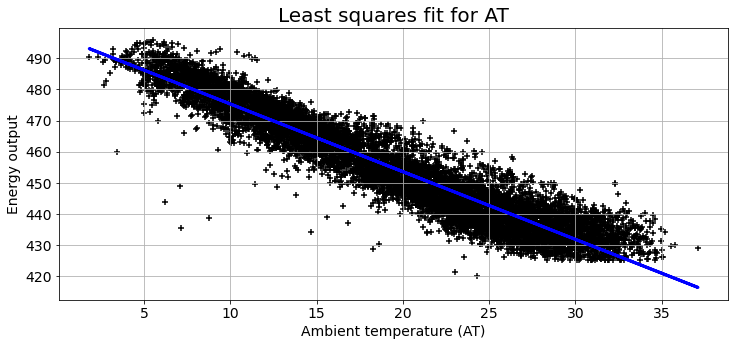

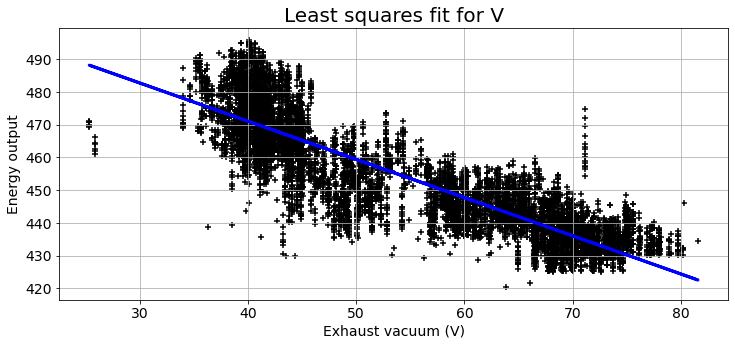

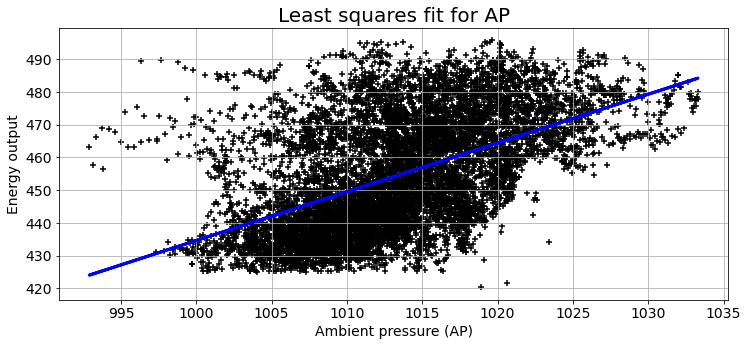

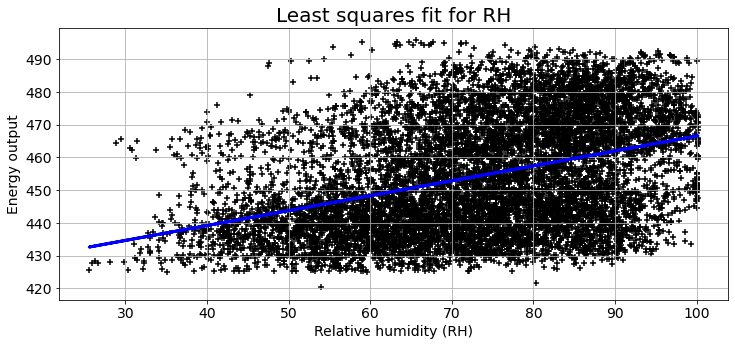

In [11]:
# plot data points and regression line
plt.figure(figsize=(12,5))
plt.grid()
plt.scatter(X_AT, y_AT,  color='black', marker="+")
plt.plot(X_AT, y_pred_AT, color='blue', linewidth=3)
plt.xlabel('Ambient temperature (AT)',fontsize=14)
plt.ylabel('Energy output',fontsize=14)
plt.title('Least squares fit for AT',fontsize=20)
plt.tick_params(labelsize=14)

# plot data points and regression line
plt.figure(figsize=(12,5))
plt.grid()
plt.scatter(X_V, y_V,  color='black', marker="+")
plt.plot(X_V, y_pred_V, color='blue', linewidth=3)
plt.xlabel('Exhaust vacuum (V)',fontsize=14)
plt.ylabel('Energy output',fontsize=14)
plt.title('Least squares fit for V',fontsize=20)
plt.tick_params(labelsize=14)

# plot data points and regression line
plt.figure(figsize=(12,5))
plt.grid()
plt.scatter(X_AP, y_AP,  color='black', marker="+")
plt.plot(X_AP, y_pred_AP, color='blue', linewidth=3)
plt.xlabel('Ambient pressure (AP)',fontsize=14)
plt.ylabel('Energy output',fontsize=14)
plt.title('Least squares fit for AP',fontsize=20)
plt.tick_params(labelsize=14)

# plot data points and regression line
plt.figure(figsize=(12,5))
plt.grid()
plt.scatter(X_RH, y_RH,  color='black', marker="+")
plt.plot(X_RH, y_pred_RH, color='blue', linewidth=3)
plt.xlabel('Relative humidity (RH)',fontsize=14)
plt.ylabel('Energy output',fontsize=14)
plt.title('Least squares fit for RH',fontsize=20)
plt.tick_params(labelsize=14)

### Comments on the least squares fit plots

1) AT plot: The least squares fit seems to be the best for the AT predictor. The scatter plots in part (b) also suggested a strong negative correlation between AT and energy output, so we can say that AT is the most important predictor for the energy output.

2) V plot: V predictor seems to not predict energy output well. Because there are several instances where identical exhaust vacuum conditions result in drastically different energy output - this is seen in the many "vertical lines" in the plot.

3) AP plot: It can be seen that among all the predictors, AP seems to have the least variance in $x_i$, which causes the multicollinearity issue with the constant term.

4) RH plot: RH predictor has a fairly good least squares fit, however some of the assumptions of the linear model, eg homoskedascity, are violated (more on this in the final conclusion in part j).

### Outlier Check

To check for outliers, I use the method of plotting residuals, in section 3.3 of [2].

#### Residual plots

Text(0.5, 1.0, 'Residual plot for RH')

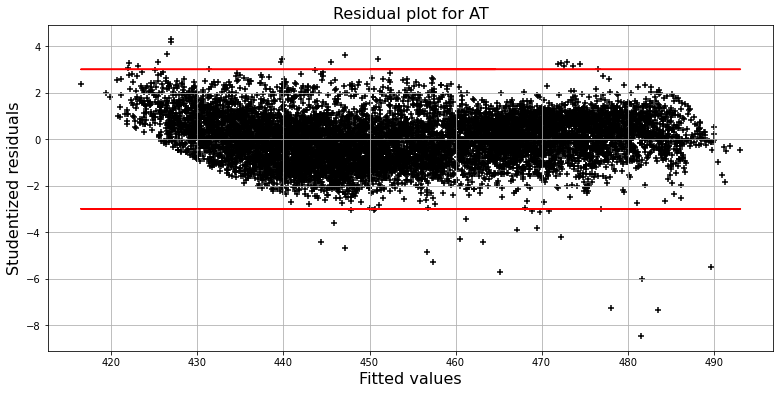

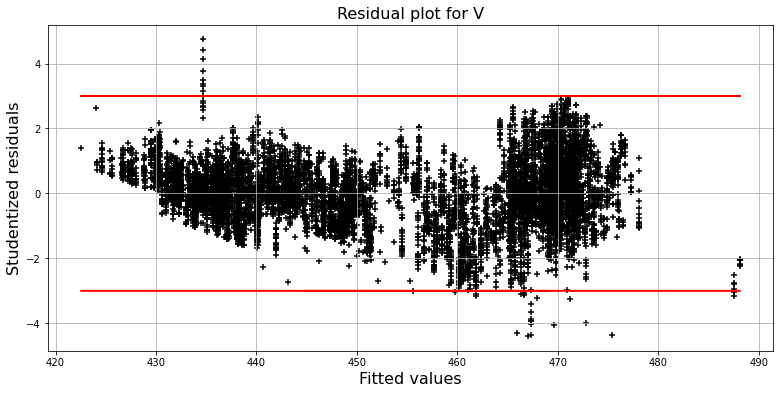

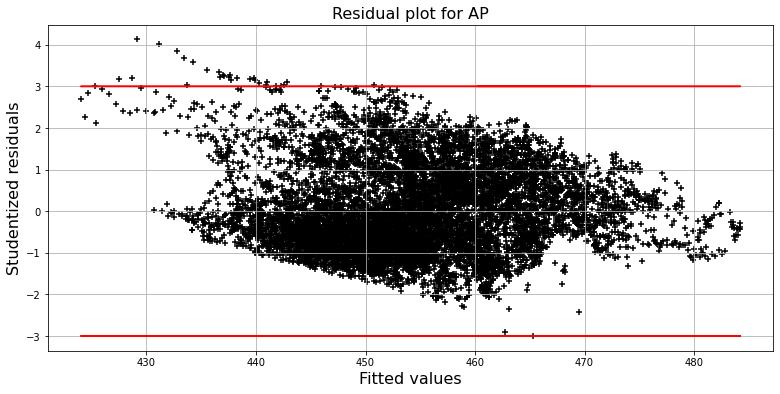

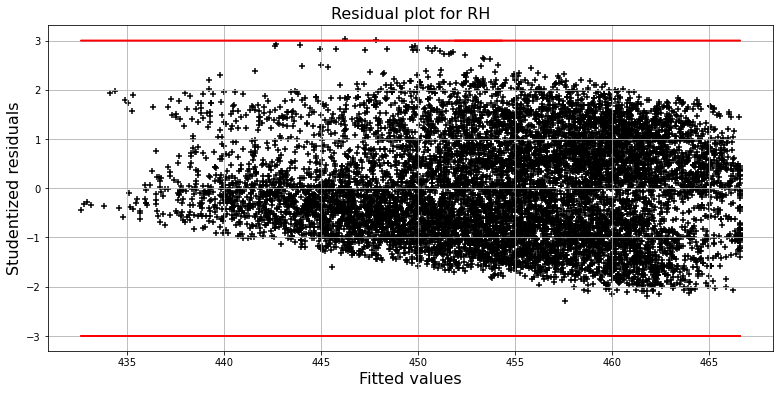

In [12]:
# calculate studentized residuals
residuals = y_AT-y_pred_AT
RSE = np.sqrt(np.sum(residuals**2)/(n-2)) # estimate residual standard error
studentized_residual_AT = residuals/RSE

# plot fitted values versus studentized residuals
plt.figure(figsize=(13,6))
plt.scatter(y_pred_AT, studentized_residual_AT,  color='black', marker="+")
plt.plot(y_pred_AT,3*np.ones(y_pred_AT.shape),  color='red')
plt.plot(y_pred_AT,-3*np.ones(y_pred_AT.shape),  color='red')
plt.grid()
plt.xlabel('Fitted values',fontsize=16)
plt.ylabel('Studentized residuals',fontsize=16)
plt.title('Residual plot for AT',fontsize=16)

# calculate studentized residuals
residuals = y_V-y_pred_V
RSE = np.sqrt(np.sum(residuals**2)/(n-2)) # estimate residual standard error
studentized_residual_V = residuals/RSE

# plot fitted values versus studentized residuals
plt.figure(figsize=(13,6))
plt.scatter(y_pred_V, studentized_residual_V,  color='black', marker="+")
plt.plot(y_pred_V,3*np.ones(y_pred_V.shape),  color='red')
plt.plot(y_pred_V,-3*np.ones(y_pred_V.shape),  color='red')
plt.grid()
plt.xlabel('Fitted values',fontsize=16)
plt.ylabel('Studentized residuals',fontsize=16)
plt.title('Residual plot for V',fontsize=16)

# calculate studentized residuals
residuals = y_AP-y_pred_AP
RSE = np.sqrt(np.sum(residuals**2)/(n-2)) # estimate residual standard error
studentized_residual_AP = residuals/RSE

# plot fitted values versus studentized residuals
plt.figure(figsize=(13,6))
plt.scatter(y_pred_AP, studentized_residual_AP,  color='black', marker="+")
plt.plot(y_pred_AP,3*np.ones(y_pred_AP.shape),  color='red')
plt.plot(y_pred_AP,-3*np.ones(y_pred_AP.shape),  color='red')
plt.grid()
plt.xlabel('Fitted values',fontsize=16)
plt.ylabel('Studentized residuals',fontsize=16)
plt.title('Residual plot for AP',fontsize=16)

# calculate studentized residuals
residuals = y_RH-y_pred_RH
RSE = np.sqrt(np.sum(residuals**2)/(n-2)) # estimate residual standard error
studentized_residual_RH = residuals/RSE

# plot fitted values versus studentized residuals
plt.figure(figsize=(13,6))
plt.scatter(y_pred_RH, studentized_residual_RH,  color='black', marker="+")
plt.plot(y_pred_RH,3*np.ones(y_pred_RH.shape),  color='red')
plt.plot(y_pred_RH,-3*np.ones(y_pred_RH.shape),  color='red')
plt.grid()
plt.xlabel('Fitted values',fontsize=16)
plt.ylabel('Studentized residuals',fontsize=16)
plt.title('Residual plot for RH',fontsize=16)

### Conclusions about outliers

It was mentioned in page 97 of [2] that datapoints with studentized residuals, $\frac{\epsilon_i}{\textrm{SE}(\epsilon_i)}$, greater than 3 in magnitude might be outliers. The red lines in the plots above mark the thresholds -3 and 3. There are approximately 20-30 datapoints that may be outliers. Compared to the total number of datapoints (~10k), the number of outliers are small. Moreover, these outliers do not affect the least square fit much as they do not have high leverage.

The only outliers that seem to have a somewhat significant leverage are in the top left corner of the AP residual plot - they have have an unusual $x_i$ value, and also have studentized residuals above the threshold of 3. However, there are only 3 such datapoints. So I choose to ignore them, as they are unlikely to affect the overall results of linear regression much. 

### Multiple regression model

In [13]:
# using in-built model for easier readability
model = ols("PE ~ AT + V + AP + RH", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Tue, 15 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:35:00   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.0

The t-statistics are large in magnitude for all coefficients, and all of their p-values are very close to 0. We can reject the null hypothesis for all of the coefficients because there is strong evidence that all of the coefficients are NOT 0. 

### Compare results from simple lin reg and multiple lin reg

In [14]:
# Extract coeffs for simple regression
print(summary)
ignore1, beta1_S, ignore2, beta2_S, ignore3, beta3_S, ignore4, beta4_S = list(summary["Coefficient"])

                     Coefficient  Std error  t-statistic  p-value
Predictor Reg Coeff                                              
AT        Intercept   497.034120   0.156434  3177.280433      0.0
          AT           -2.171320   0.007443  -291.715195      0.0
V         Intercept   517.801526   0.377897  1370.218159      0.0
          V            -1.168135   0.006776  -172.401540      0.0
AP        Intercept -1055.260989  25.459492   -41.448628      0.0
          AP            1.489872   0.025126    59.296232      0.0
RH        Intercept   420.961766   0.822711   511.676167      0.0
          RH            0.455650   0.011006    41.398730      0.0


In [15]:
# Extract coeffs for multiple regression
beta0_M, beta1_M, beta2_M, beta3_M, beta4_M = list(model.params)

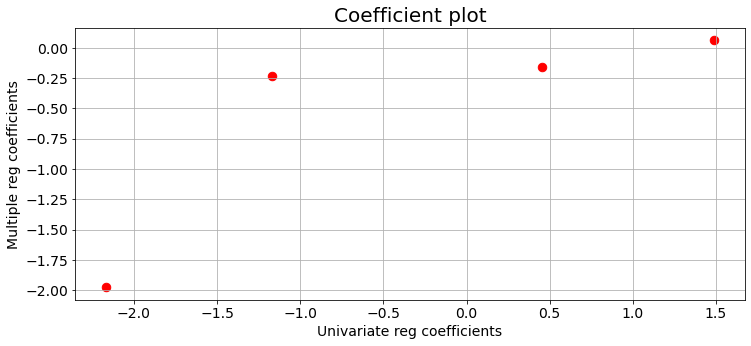

In [16]:
x = [beta1_S, beta2_S, beta3_S, beta4_S]
y = [beta1_M, beta2_M, beta3_M, beta4_M]

# plot univariate and multiple regression coeffs
plt.figure(figsize=(12,5))
plt.grid()
plt.scatter(x, y,  color='red', marker="o", s=72)
plt.xlabel('Univariate reg coefficients',fontsize=14)
plt.ylabel('Multiple reg coefficients',fontsize=14)
plt.title('Coefficient plot',fontsize=20)
plt.tick_params(labelsize=14)

### Check for non linearity

Here we fit models of the form $Y=\beta_0+\beta_1 X+\beta_2 X^2 + \beta_3 X^3 + \epsilon$ for each predictor to check for evidence of non-linearity. The results are summarized after the following code blocks.

In [17]:
X_AT = np.array(data.drop(["V","AP","RH","PE"],axis=1))
y_AT = np.array(data["PE"]).reshape((n,1))
poly = PolynomialFeatures(3, include_bias=False)
X_AT = poly.fit_transform(X_AT)
nonlin_AT = pd.DataFrame(np.append(X_AT,y_AT,axis=1), columns=["AT","AT2","AT3","PE"])
model = ols("PE ~ AT + AT2 + AT3", nonlin_AT).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Tue, 15 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:35:01   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    492.7281      0.673    732.248      0.0

In [18]:
X_V = np.array(data.drop(["AT","AP","RH","PE"],axis=1))
y_V = np.array(data["PE"]).reshape((n,1))
poly = PolynomialFeatures(3, include_bias=False)
X_V = poly.fit_transform(X_V)
nonlin_V = pd.DataFrame(np.append(X_V,y_V,axis=1), columns=["V","V2","V3","PE"])
model = ols("PE ~ V + V2 + V3", nonlin_V).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Tue, 15 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:35:01   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    554.1468      9.151     60.557      0.0

In [19]:
X_AP = np.array(data.drop(["AT","V","RH","PE"],axis=1))
y_AP = np.array(data["PE"]).reshape((n,1))
poly = PolynomialFeatures(3, include_bias=False)
X_AP = poly.fit_transform(X_AP)
nonlin_AP = pd.DataFrame(np.append(X_AP,y_AP,axis=1), columns=["AP","AP2","AP3","PE"])
model = ols("PE ~ AP + AP2 + AP3", nonlin_AP).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Tue, 15 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:35:01   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0747      0.009      8.415      0.0

In [20]:
X_RH = np.array(data.drop(["AT","AP","V","PE"],axis=1))
y_RH = np.array(data["PE"]).reshape((n,1))
poly = PolynomialFeatures(3, include_bias=False)
X_RH = poly.fit_transform(X_RH)
nonlin_RH = pd.DataFrame(np.append(X_RH,y_RH,axis=1), columns=["RH","RH2","RH3","PE"])
model = ols("PE ~ RH + RH2 + RH3", nonlin_RH).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Tue, 15 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:35:01   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    468.4135     10.545     44.422      0.0

### Conclusions about non-linearity

The p-values, $P>|t|$, can be used to decide if the non linear terms are statistically significant. We consider a level of doubt of $\alpha=0.05$, so we will reject any variable which has a p-value greater than $\alpha$.

<h4><center>Summary of p-values of nonlinear terms </center></h4>

|| AT | V | AP | RH |
| --- | --- | --- | --- | -- |
|$$X$$ | 0.000 | 0.000 | 0.000 | 0.000 |
|$$X^2$$ | 0.000 | 0.768 | 0.000 | 0.000 |
|$$X^3$$ | 0.000 | 0.014 | 0.000 | 0.000 |

Therefore, we will discard the quadratic term for variable V and keep all the other quadratic terms for the question in part (h).

### Check for interactions between predictors

First, we create a new dataset with all the interaction terms included as new predictors. Then we run the linear regression models with the new dataset and check the p-values of the interaction terms. The results are summarized after the following code blocks.

In [21]:
# extract all predictors and output individually
AT = np.array(data["AT"]).reshape(n,1)
V = np.array(data["V"]).reshape(n,1)
AP = np.array(data["AP"]).reshape(n,1)
RH = np.array(data["RH"]).reshape(n,1)
PE = np.array(data["PE"]).reshape(n,1)

# create all interaction terms
AT_V = np.multiply(AT,V)
AT_AP = np.multiply(AT,AP)
AT_RH = np.multiply(AT,RH)
V_AP = np.multiply(V,AP)
V_RH = np.multiply(V,RH)
AP_RH = np.multiply(AP,RH)

# create new dataset with all predictors and all interaction terms
all_features = np.hstack((AT,V,AP,RH,AT_V,AT_AP,AT_RH,V_AP,V_RH,AP_RH,PE))
new_data = pd.DataFrame(all_features,columns=["AT","V","AP","RH","AT_V","AT_AP","AT_RH","V_AP","V_RH","AP_RH","PE"])
new_data

,AT,V,AP,RH,AT_V,AT_AP,AT_RH,V_AP,V_RH,AP_RH,PE
0,14.96,41.76,1024.07,73.17,624.7296,15320.0872,1094.6232,42765.1632,3055.5792,74931.2019,463.26
1,25.18,62.96,1020.04,59.08,1585.3328,25684.6072,1487.6344,64221.7184,3719.6768,60263.9632,444.37
2,5.11,39.40,1012.16,92.14,201.3340,5172.1376,470.8354,39879.1040,3630.3160,93260.4224,488.56
3,20.86,57.32,1010.24,76.64,1195.6952,21073.6064,1598.7104,57906.9568,4393.0048,77424.7936,446.48
4,10.82,37.50,1009.23,96.62,405.7500,10919.8686,1045.4284,37846.1250,3623.2500,97511.8026,473.90
...,...,...,...,...,...,...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,827.3385,16883.2665,1515.1500,50386.1569,4521.7900,92274.9100,460.03
9564,13.19,39.18,1023.67,66.78,516.7842,13502.2073,880.8282,40107.3906,2616.4404,68360.6826,469.62
9565,31.32,74.33,1012.92,36.48,2328.0156,31724.6544,1142.5536,75290.3436,2711.5584,36951.3216,429.57
9566,24.48,69.45,1013.86,62.39,1700.1360,24819.2928,1527.3072,70412.5770,4332.9855,63254.7254,435.74


In [22]:
# Run full linear regression model with all interaction terms
model = ols("PE ~ AT + V + AP + RH + AT_V + AT_AP + AT_RH + V_AP + V_RH + AP_RH", new_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Tue, 15 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:35:01   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

### Conclusions about interaction terms

We first look at the p-values of the interaction terms only:

<h4><center>Table of p-values of interaction terms </center></h4>

|| AT_V | AT_AP | AT_RH | V_AP | V_RH | AP_RH |
| --- | --- | --- | --- | --- | --- | --- |
|p-value | 0.000 | 0.452 | 0.000 | 0.000 | 0.086| 0.034 |

If the interaction terms have a p-value greater than $\alpha=0.05$, then there is insufficient evidence to reject the null. Therefore, we discard such interaction terms. In other words, we discard AT_AP and V_RH.

Now, we look at the p-values of the individual predictors:

<h4><center>Table of p-values of individual predictors </center></h4>

|| AT | V | AP | RH |
| --- | --- | --- | --- | --- |
|p-value | 0.067 | 0.000 | 0.047 | 0.042 |

The table suggests that we should discard AT. However, there are significant interaction terms involving AT, such as AT_V and AT_RH. 

By the hierarchical principle, it is important to not discard AT as that would reduce interpretability.

Therefore, the statistically significant interactions are between: 

1) AT and V

2) AT and RH

3) V and AP

4) AP and RH

### Run multiple regression models on original and modified dataset

First, we create a modified dataset with all the predictors, significant interaction terms and quadractic terms. We will call this mod_data.

In [23]:
# extract all predictors and output individually
AT = np.array(data["AT"]).reshape(n,1)
V = np.array(data["V"]).reshape(n,1)
AP = np.array(data["AP"]).reshape(n,1)
RH = np.array(data["RH"]).reshape(n,1)
PE = np.array(data["PE"]).reshape(n,1)

# create significant interaction terms
AT_V = np.multiply(AT,V)
AT_RH = np.multiply(AT,RH)
V_AP = np.multiply(V,AP)
AP_RH = np.multiply(AP,RH)

# create all significant quadratic terms
AT2 = np.multiply(AT,AT)
AP2 = np.multiply(AP,AP)
RH2 = np.multiply(RH,RH)

all_features = np.hstack((AT,V,AP,RH,AT_V,AT_RH,V_AP,AP_RH,AT2,AP2,RH2,PE))
mod_data = pd.DataFrame(all_features,columns=["AT","V","AP","RH","AT_V","AT_RH","V_AP","AP_RH","AT2","AP2","RH2","PE"])
mod_data

,AT,V,AP,RH,AT_V,AT_RH,V_AP,AP_RH,AT2,AP2,RH2,PE
0,14.96,41.76,1024.07,73.17,624.7296,1094.6232,42765.1632,74931.2019,223.8016,1.048719e+06,5353.8489,463.26
1,25.18,62.96,1020.04,59.08,1585.3328,1487.6344,64221.7184,60263.9632,634.0324,1.040482e+06,3490.4464,444.37
2,5.11,39.40,1012.16,92.14,201.3340,470.8354,39879.1040,93260.4224,26.1121,1.024468e+06,8489.7796,488.56
3,20.86,57.32,1010.24,76.64,1195.6952,1598.7104,57906.9568,77424.7936,435.1396,1.020585e+06,5873.6896,446.48
4,10.82,37.50,1009.23,96.62,405.7500,1045.4284,37846.1250,97511.8026,117.0724,1.018545e+06,9335.4244,473.90
...,...,...,...,...,...,...,...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,827.3385,1515.1500,50386.1569,92274.9100,277.2225,1.028216e+06,8281.0000,460.03
9564,13.19,39.18,1023.67,66.78,516.7842,880.8282,40107.3906,68360.6826,173.9761,1.047900e+06,4459.5684,469.62
9565,31.32,74.33,1012.92,36.48,2328.0156,1142.5536,75290.3436,36951.3216,980.9424,1.026007e+06,1330.7904,429.57
9566,24.48,69.45,1013.86,62.39,1700.1360,1527.3072,70412.5770,63254.7254,599.2704,1.027912e+06,3892.5121,435.74


Now, we do train test splits for both the original dataset (data) and the modified dataset (mod_data).

In [24]:
seed = 42 # use common seed to select 70% training subset for both datasets to be fair

X = data.drop(["PE"],axis=1)
y = data["PE"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

mod_X = mod_data.drop(["PE"],axis=1)
mod_y = mod_data["PE"]
mod_X_train, mod_X_test, mod_y_train, mod_y_test = train_test_split(mod_X, mod_y, test_size=0.3, random_state=seed)

In [25]:
# Train on original dataset
reg = LinearRegression().fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
train_MSE = (np.sum(np.square(y_train_pred-y_train)))/len(y_train)
y_test_pred = reg.predict(X_test)
test_MSE = (np.sum(np.square(y_test_pred-y_test)))/len(y_test)
print(train_MSE)
print(test_MSE)
print(reg.score(X_train,y_train))
print(reg.score(X_test,y_test))

# Train on modified dataset
reg = LinearRegression().fit(mod_X_train, mod_y_train)
mod_y_train_pred = reg.predict(mod_X_train)
mod_train_MSE = (np.sum(np.square(mod_y_train_pred-mod_y_train)))/len(mod_y_train)
mod_y_test_pred = reg.predict(mod_X_test)
mod_test_MSE = (np.sum(np.square(mod_y_test_pred-mod_y_test)))/len(mod_y_test)
print(mod_train_MSE)
print(mod_test_MSE)
print(reg.score(mod_X_train,mod_y_train))
print(reg.score(mod_X_test,mod_y_test))

20.580839725738695
21.23985693822551
0.9291361021558927
0.9275484963869203
17.893292691578907
18.652607819678774
0.9383898576400168
0.9363738895807403


### Train and test MSEs

<h4><center>Summary of train and test MSEs </center></h4>

|| Original | Modified | 
| --- | --- | --- | 
|Train MSE | 20.5 | 17.8 |
|Test MSE | 21.2 | 18.6 |
|Train $R^2$ | 0.929 | 0.938 |
|Test $R^2$ | 0.927 | 0.936 |

Both train and test MSEs are reduced in the modified dataset, which suggests that the extra terms included are useful in predicting the energy output. The $R^2$ scores have also increased. This means that $(93.6-92.7)/(100-92.7)=12.3\%$ of the variability in the energy output (in the test set) has been explained by the interaction and quadratic terms. 

### Perform KNN regression

In [26]:
# use common seed to select 70% training subset for both datasets to be fair
seed = 42 

# get X and y for raw dataset
X = np.array(data.drop(["PE"],axis=1))
y = np.array(data["PE"])

# normalize features X and store in X_norm
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X) 

# do train test splits for both raw and normalized data
# NOTE: outputs y are NOT normalized
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
X_train_norm, X_test_norm = train_test_split(X_norm, test_size=0.3, random_state=seed)

# init store vectors
train_error = []
test_error = []
train_error_norm = []
test_error_norm = []

# run KNN reg for various Ks and store errors
K_range = np.arange(1,101,1)
for K in K_range:
    
    # KNN reg for raw features
    knn = neighbors.KNeighborsRegressor(K, p=2) # distance metric is euclidean
    knn.fit(X_train, y_train)
    
    y_train_pred = knn.predict(X_train)
    train_MSE = mean_squared_error(y_train_pred,y_train)
    train_error.append(train_MSE)
    
    y_test_pred = knn.predict(X_test)
    test_MSE = mean_squared_error(y_test_pred,y_test)
    test_error.append(test_MSE)
    
    # KNN reg for normalized features
    knn_norm = neighbors.KNeighborsRegressor(K, p=2) # distance metric is euclidean
    knn_norm.fit(X_train_norm, y_train)
    
    y_train_pred_norm = knn_norm.predict(X_train_norm)
    train_MSE_norm = mean_squared_error(y_train_pred_norm,y_train)
    train_error_norm.append(train_MSE_norm)
    
    y_test_pred_norm = knn_norm.predict(X_test_norm)
    test_MSE_norm = mean_squared_error(y_test_pred_norm,y_test)
    test_error_norm.append(test_MSE_norm)


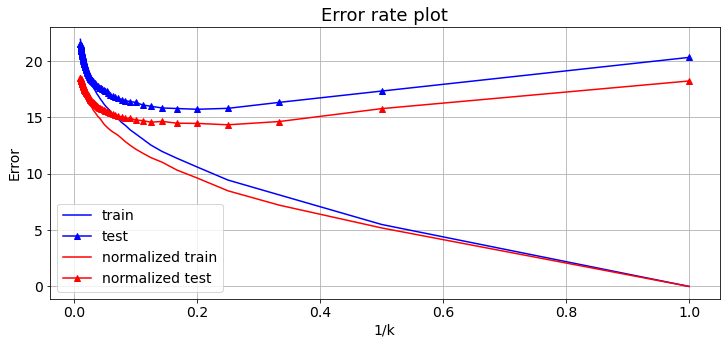

In [27]:
# plot train and test errors
plt.figure(figsize=(12,5))
plt.grid()
plt.plot(1/K_range,train_error,'b-')
plt.plot(1/K_range,test_error,'b-^')
plt.plot(1/K_range,train_error_norm,'r-')
plt.plot(1/K_range,test_error_norm,'r-^')
plt.legend(["train", "test", "normalized train", "normalized test"], fontsize=14)
plt.xlabel('1/k',fontsize=14)
plt.ylabel('Error',fontsize=14)
plt.title('Error rate plot',fontsize=18)
plt.tick_params(labelsize=14)

In [28]:
print(K_range[np.argmin(test_error)]) # best K for raw features
print(K_range[np.argmin(test_error_norm)]) # best K for normalized features

5
4


### Best K and observations

1) The best value of $K$ is chosen by looking at the lowest test errors. For the normalized features, $K_n^*=4$ performs the best, whereas for the raw features, $K_r^*=5$ does the best. I expect the distances between features to be reduced when features are normalized, therefore $K_n^*<K_r^*$ makes intuitive sense.

2) From the train and test errors plotted, we notice that the normalized features offer some reduction in error rate in both train and test sets. I think this is because our feature vector now contains quadratic terms which are huge in magnitude, and are correlated with the respective original predictors. So normalization helps to reduce the distances between feature vectors in high dimensional space, thereby lessening the impact of the curse of dimensionality.

3) The train MSEs increase monotonously with $K$. I think this is more common in KNN regression than in KNN classification. In KNN regression, when we predict the output values by averaging with a nearest neighbour, the averaged output will always be further away from the original output of that train datapoint. And this is expected to get worse when averaging with more nearest neighbors. However, such averaging is beneficial in the test dataset, i.e., for previously unseen data.

### Compare KNN reg and linear reg test errors

In [29]:
MSE_KNN_reg = np.min([np.min(test_error),np.min(test_error_norm)])
MSE_lin_reg = np.min([mod_test_MSE,test_MSE])
print(MSE_lin_reg) # Linear regression mean-squared error
print(MSE_KNN_reg) # KNN mean-squared error

18.652607819678774
14.348653474399166


### ANALYSIS

KNN MSE - 14.34, Lin Reg MSE - 18.6. KNN regression outperforms linear regression significantly. 


The reasons for this can be attributed to the assumptions of the linear model, which are violated in this dataset. 

1) Assumption: Homoskedasticity, $Var[\epsilon_i]=\sigma^2$ (constant). But this assumption is clearly violated, and is observable in the least squares plot for Relative Humidity and Ambient Pressure. The variance of the error clearly increases with larger values of RH and AP.


2) Assumption: $E[\epsilon]=0$. However, when looking at the least squares plot for RH, it is evident that positive errors are larger in magnitude, which would inevitably result in $E[\epsilon]\neq 0$. Similar observations can be made in least square plots for other predictors.


3) Assumption: Error $\epsilon_i$ and $x_i$ are independent. This is perhaps most visibly violated in the residual plots for V, AP and RH. The error clearly shows a dependency on $x_i$. For example, in the RH residual plot, the errors $\epsilon_i$ seem to be negatively correlated with $x_i$.


4) Assumption: Error terms are independently distributed. However, this dataset is said to be hourly averages of the plant's ambient variables and energy output. This means that there is some correlation in the time-series data.

All these assumptions have been violated in this dataset, which means we cannot expect linear regression to work well for this dataset. However, it is a very useful tool in analysis, as it provides alot of insight into how the predictors interact with one another and how they impact the output.

KNN regression works well for this dataset. In general, KNN regression works well for datasets where feature similarity results in similar outputs. This is somewhat true for this dataset - similar plant ambient variables would result in similar energy outputs. I would expect KNN regression to work even better on this dataset if more relevant ambient variables are accurately measured and included in the feature vector.

### References

[1] https://stats.stackexchange.com/questions/188607/multicollinearity-in-simple-linear-regression-not-multiple

[2] ISLR pdf: https://static1.squarespace.com/static/5ff2adbe3fe4fe33db902812/t/6009dd9fa7bc363aa822d2c7/1611259312432/ISLR+Seventh+Printing.pdf